In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
url = 'https://shop.tamimimarkets.com/category/fruits--vegetables'


In [3]:
r = requests.get(url)
r

<Response [200]>

In [4]:
soup = BeautifulSoup(r.text , 'html.parser')

In [5]:
soup.title.text

'Buy FRUITS & VEGETABLES products on Tamimi Markets'

In [6]:
first_product = soup.find('div' , {'class' :'Product__StyledContainer-sc-13egllk-3 jZjDoo'})
first_product

<div class="Product__StyledContainer-sc-13egllk-3 jZjDoo" data-testid="product"><div class="Product__PlainDiv-sc-13egllk-9 cOcUiG image"><span class="Image__StyledContainer-sc-1chszkr-0 iHwWfT"><img alt="no image" class="NoImg__Image-sc-1tfmw9g-0 fURmyQ no-image Image__StyledNoImageIcon-sc-1chszkr-2 gJIsFg" loading="lazy" src="/static/no-image.svg"/></span></div><div class="Product__StyledCartCounter-sc-13egllk-7 dyAglq"><svg color="#BE1E2E" height="24" viewbox="0 0 40 40" width="24" xmlns="http://www.w3.org/2000/svg"><title></title><g fill="none"><circle cx="20" cy="20" fill="currentColor" r="20"></circle><g fill="#FFFFFF" transform="translate(12 12)"><rect height="16" rx="1" transform="rotate(90 8 8)" width="4" x="6"></rect><rect height="16" rx="1" width="4" x="6"></rect></g></g></svg></div><div class="Product__StyledInfo-sc-13egllk-6 judGYR"><div class="Product__PriceAndSaveButton-sc-13egllk-8 knCWfn"><span class="Text-sc-1bsd7ul-0 bWrtIK"><span>SAR 2.13</span></span></div><div clas

In [7]:
first_product.prettify()

'<div class="Product__StyledContainer-sc-13egllk-3 jZjDoo" data-testid="product">\n <div class="Product__PlainDiv-sc-13egllk-9 cOcUiG image">\n  <span class="Image__StyledContainer-sc-1chszkr-0 iHwWfT">\n   <img alt="no image" class="NoImg__Image-sc-1tfmw9g-0 fURmyQ no-image Image__StyledNoImageIcon-sc-1chszkr-2 gJIsFg" loading="lazy" src="/static/no-image.svg"/>\n  </span>\n </div>\n <div class="Product__StyledCartCounter-sc-13egllk-7 dyAglq">\n  <svg color="#BE1E2E" height="24" viewbox="0 0 40 40" width="24" xmlns="http://www.w3.org/2000/svg">\n   <title>\n   </title>\n   <g fill="none">\n    <circle cx="20" cy="20" fill="currentColor" r="20">\n    </circle>\n    <g fill="#FFFFFF" transform="translate(12 12)">\n     <rect height="16" rx="1" transform="rotate(90 8 8)" width="4" x="6">\n     </rect>\n     <rect height="16" rx="1" width="4" x="6">\n     </rect>\n    </g>\n   </g>\n  </svg>\n </div>\n <div class="Product__StyledInfo-sc-13egllk-6 judGYR">\n  <div class="Product__PriceAndS

In [8]:
first_product.find('div', {'class':'Product__StyledTitle-sc-13egllk-5 eWbtuE'}).text

'Mandarine Murcot Egypt - 250 g'

In [9]:
first_product.find('div', {'class': 'Product__PriceAndSaveButton-sc-13egllk-8 knCWfn'}).text.strip()

'SAR\xa02.13'

In [10]:
first_product.find('span', {'class': 'Text-sc-1bsd7ul-0 bWrtIK'}).text

'SAR\xa02.13'

In [11]:
first_product.find('span', {'class': 'Text-sc-1bsd7ul-0 Product__StyledText-sc-13egllk-10 YTVid'})

In [12]:
def extract_details(prod):
    product_name_element = prod.find('div', {'class': 'Product__StyledTitle-sc-13egllk-5 eWbtuE'})
    product_name = product_name_element.text.strip() if product_name_element else None

    product_new_price_element = prod.find('span', {'class': 'Text-sc-1bsd7ul-0 bWrtIK'})
    product_new_price = product_new_price_element.text.strip() if product_new_price_element else None

    product_old_price_element = prod.find('span', {'class': 'Text-sc-1bsd7ul-0 Product__StyledText-sc-13egllk-10 YTVid'})
    product_old_price = product_old_price_element.text.strip() if product_old_price_element else None

    return product_name, product_new_price, product_old_price

In [13]:
product = soup.find_all('div' , {'class' :'Product__StyledContainer-sc-13egllk-3 jZjDoo'})
product

[<div class="Product__StyledContainer-sc-13egllk-3 jZjDoo" data-testid="product"><div class="Product__PlainDiv-sc-13egllk-9 cOcUiG image"><span class="Image__StyledContainer-sc-1chszkr-0 iHwWfT"><img alt="no image" class="NoImg__Image-sc-1tfmw9g-0 fURmyQ no-image Image__StyledNoImageIcon-sc-1chszkr-2 gJIsFg" loading="lazy" src="/static/no-image.svg"/></span></div><div class="Product__StyledCartCounter-sc-13egllk-7 dyAglq"><svg color="#BE1E2E" height="24" viewbox="0 0 40 40" width="24" xmlns="http://www.w3.org/2000/svg"><title></title><g fill="none"><circle cx="20" cy="20" fill="currentColor" r="20"></circle><g fill="#FFFFFF" transform="translate(12 12)"><rect height="16" rx="1" transform="rotate(90 8 8)" width="4" x="6"></rect><rect height="16" rx="1" width="4" x="6"></rect></g></g></svg></div><div class="Product__StyledInfo-sc-13egllk-6 judGYR"><div class="Product__PriceAndSaveButton-sc-13egllk-8 knCWfn"><span class="Text-sc-1bsd7ul-0 bWrtIK"><span>SAR 2.13</span></span></div><div cla

In [14]:
categories = ['bakery', 'bbq-accessories', 'meat', 'poultry', 'seafood', 'dairy', 'food--beverages','breakfast','imported-2',
              'fresh' , 'healthy-living' ,'household' , 'baby-1' , 'food-3' , 'accessories' , 'tamimi-product']

In [15]:
base_url = 'https://shop.tamimimarkets.com/category/'

# Selenium

In [16]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

driver = webdriver.Chrome()

products_name = []
products_new_price = []
products_old_price = []

for category in categories:
    category_url = base_url + category
    
    driver.get(category_url)
    
    try:
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, 'Product__StyledContainer-sc-13egllk-3')))        
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        
        products = soup.find_all('div', class_='Product__StyledContainer-sc-13egllk-3 jZjDoo') 

        for prod in products:
            product_name, product_new_price, product_old_price = extract_details(prod)
            products_name.append(product_name)
            products_new_price.append(product_new_price)
            products_old_price.append(product_old_price) 

            print("Product Name:", product_name)
            print("Price:", product_new_price)
            print("Old Price:", product_old_price)
            print("----------")
    
    except Exception as e:
        print("Failed to retrieve data for category:", category)
        print(e)

driver.quit()

Product Name: Tamimi Small Arabic White Bread - 1PCS
Price: SAR 1.00
Old Price: None
----------
Product Name: White Samoli - 1 PCs
Price: SAR 1.50
Old Price: None
----------
Product Name: Tamimi Crossiant Plain margarine - 6PCS
Price: SAR 7.00
Old Price: None
----------
Product Name: Tamimi Philippine Bread Pan De Sal - 1PCS
Price: SAR 4.95
Old Price: SAR 6.95
----------
Product Name: Tamimi Arabic Brown Bread with Grains - 1 bag
Price: SAR 2.40
Old Price: None
----------
Product Name: Tamimi White Tortilla Bread - 10 X 1.5Z
Price: SAR 4.95
Old Price: None
----------
Product Name: Tamimi Chocolate Chunk Cookies - 12×1.5Z
Price: SAR 27.95
Old Price: None
----------
Product Name: Baguette White 58Cm - 280G
Price: SAR 4.05
Old Price: None
----------
Product Name: Fine Butter Croissant - 30G
Price: SAR 2.50
Old Price: None
----------
Product Name: Tamimi White Milk Roll Bread - 1PCS
Price: SAR 3.15
Old Price: None
----------
Product Name: Brown Bread Tortilla - 10 count
Price: SAR 4.95
Old

In [17]:
df = pd.DataFrame({'name':products_name, 'price':products_new_price, 'old_price':products_old_price})
df

,name,price,old_price
0,Tamimi Small Arabic White Bread - 1PCS,SAR 1.00,None
1,White Samoli - 1 PCs,SAR 1.50,None
2,Tamimi Crossiant Plain margarine - 6PCS,SAR 7.00,None
3,Tamimi Philippine Bread Pan De Sal - 1PCS,SAR 4.95,SAR 6.95
4,Tamimi Arabic Brown Bread with Grains - 1 bag,SAR 2.40,None
...,...,...,...
315,Tamimi Markets Since 1979 French Fries - 2.5Kg,SAR 18.95,SAR 25.95
316,Tamimi Markets Since 1979 Premium Conchiglie P...,SAR 3.95,None
317,Tamimi Markets Since 1979 Maxi Roll - 1 Roll,SAR 14.95,SAR 19.95
318,Tamimi Markets Since 1979 Sesame Tahina - 400G,SAR 15.95,None


In [18]:
df.price = df.price.str.extract(r'(\d+\.\d+)')
df

,name,price,old_price
0,Tamimi Small Arabic White Bread - 1PCS,1.00,None
1,White Samoli - 1 PCs,1.50,None
2,Tamimi Crossiant Plain margarine - 6PCS,7.00,None
3,Tamimi Philippine Bread Pan De Sal - 1PCS,4.95,SAR 6.95
4,Tamimi Arabic Brown Bread with Grains - 1 bag,2.40,None
...,...,...,...
315,Tamimi Markets Since 1979 French Fries - 2.5Kg,18.95,SAR 25.95
316,Tamimi Markets Since 1979 Premium Conchiglie P...,3.95,None
317,Tamimi Markets Since 1979 Maxi Roll - 1 Roll,14.95,SAR 19.95
318,Tamimi Markets Since 1979 Sesame Tahina - 400G,15.95,None


In [19]:
df['has_discount'] = df['old_price'].notna()
df

,name,price,old_price,has_discount
0,Tamimi Small Arabic White Bread - 1PCS,1.00,None,False
1,White Samoli - 1 PCs,1.50,None,False
2,Tamimi Crossiant Plain margarine - 6PCS,7.00,None,False
3,Tamimi Philippine Bread Pan De Sal - 1PCS,4.95,SAR 6.95,True
4,Tamimi Arabic Brown Bread with Grains - 1 bag,2.40,None,False
...,...,...,...,...
315,Tamimi Markets Since 1979 French Fries - 2.5Kg,18.95,SAR 25.95,True
316,Tamimi Markets Since 1979 Premium Conchiglie P...,3.95,None,False
317,Tamimi Markets Since 1979 Maxi Roll - 1 Roll,14.95,SAR 19.95,True
318,Tamimi Markets Since 1979 Sesame Tahina - 400G,15.95,None,False


In [20]:
df.has_discount.value_counts()

has_discount
False    209
True     111
Name: count, dtype: int64

In [21]:
df.has_discount.value_counts(normalize=True)


has_discount
False    0.653125
True     0.346875
Name: proportion, dtype: float64

<Axes: ylabel='count'>

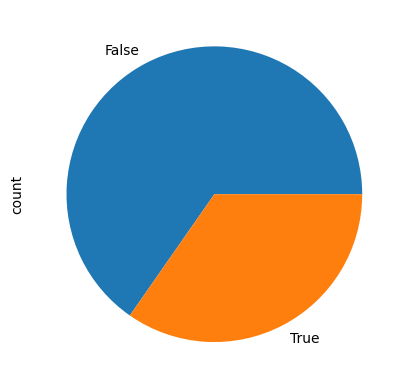

In [22]:
df.has_discount.value_counts().plot.pie()

In [23]:
df.to_csv('tamimi_sample_prod.csv')